<h1>DENGUE CASES TREND FROM 2016 - 2020</h1>
<h2>Analyst: Meloujean Ligon</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

dengue.dtypes

In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [7]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


<h1>BAR PLOT</h1>

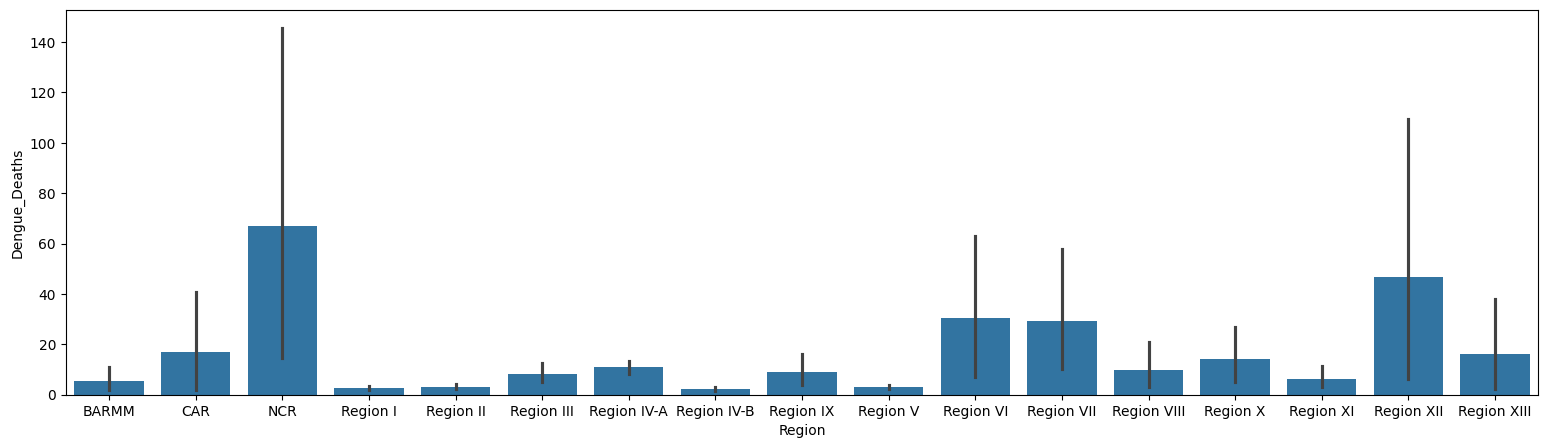

In [8]:
sns.barplot(data=dengue, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 5) 
plt.show()

<h1>LINE PLOT</h1>

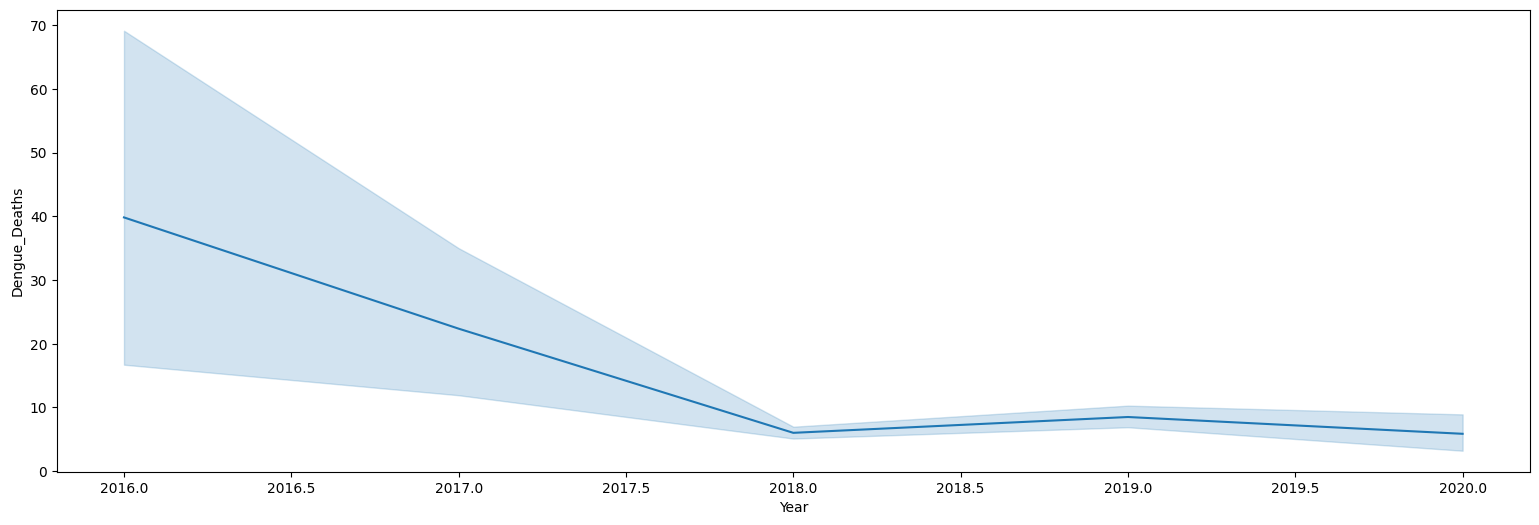

In [9]:
sns.lineplot(data=dengue, y="Dengue_Deaths", x="Year")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>SCATTER PLOT</h1>

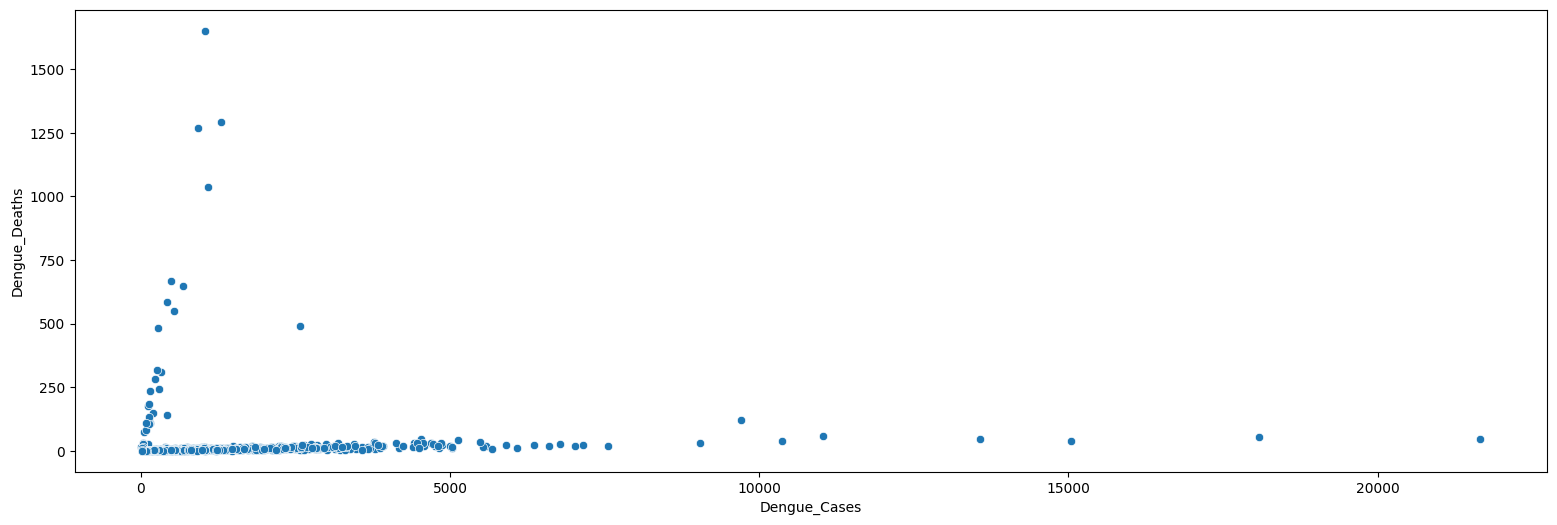

In [10]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>BOX PLOT</h1>

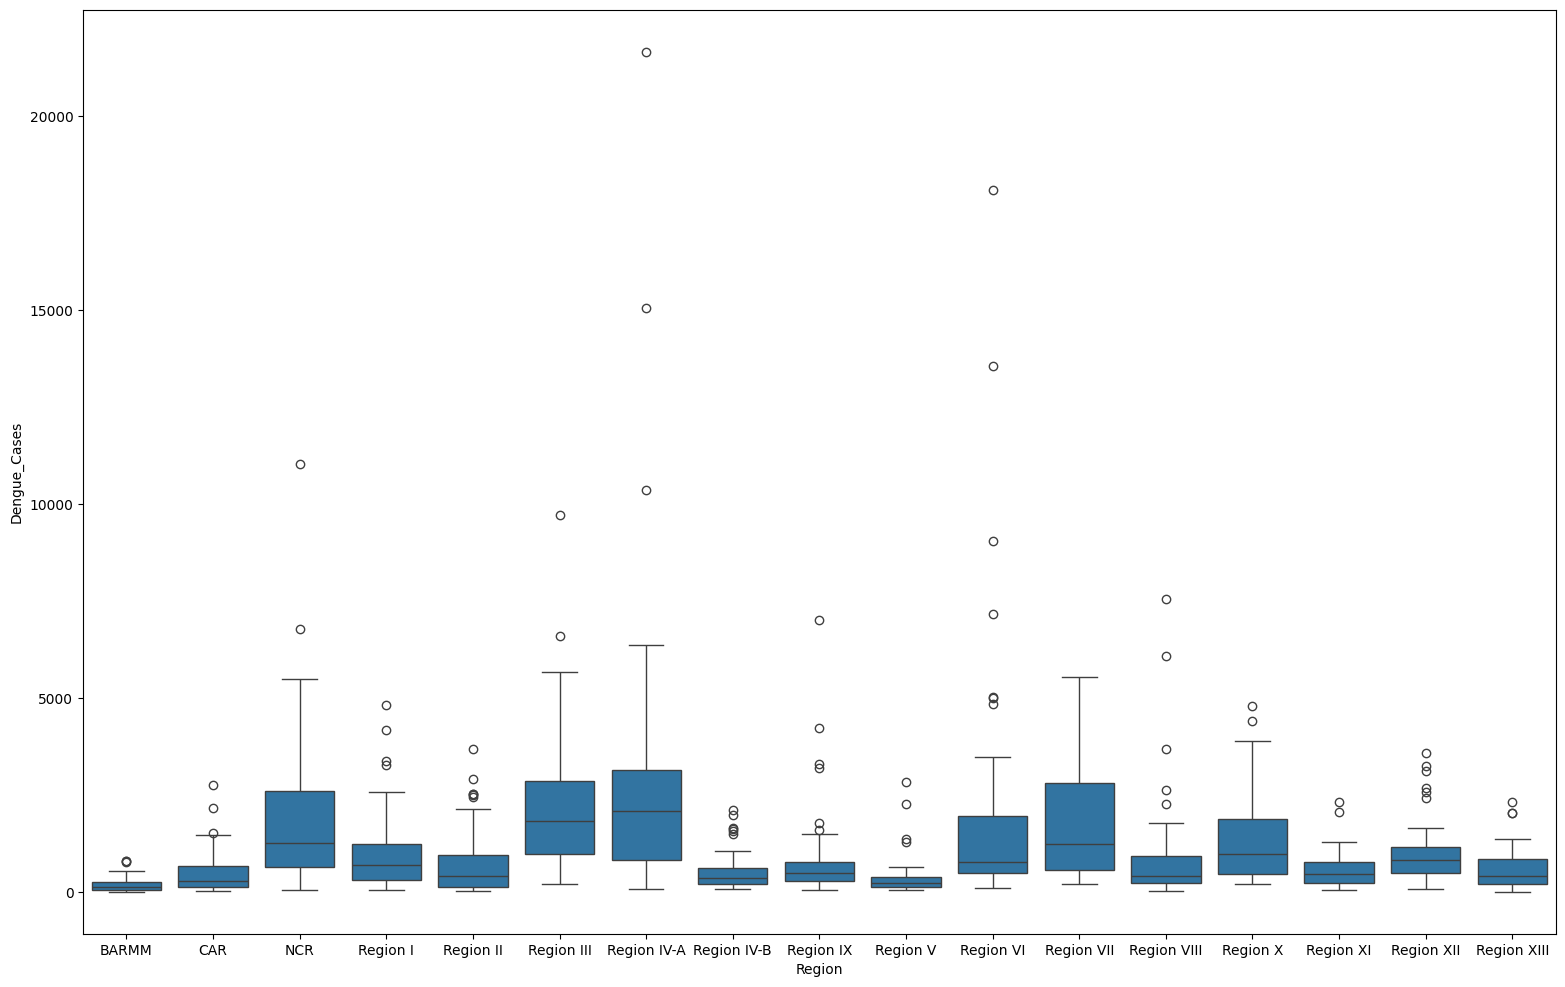

In [11]:
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

In [12]:
dengue_V2 = dengue[dengue["Year"] != '2019-01-01']

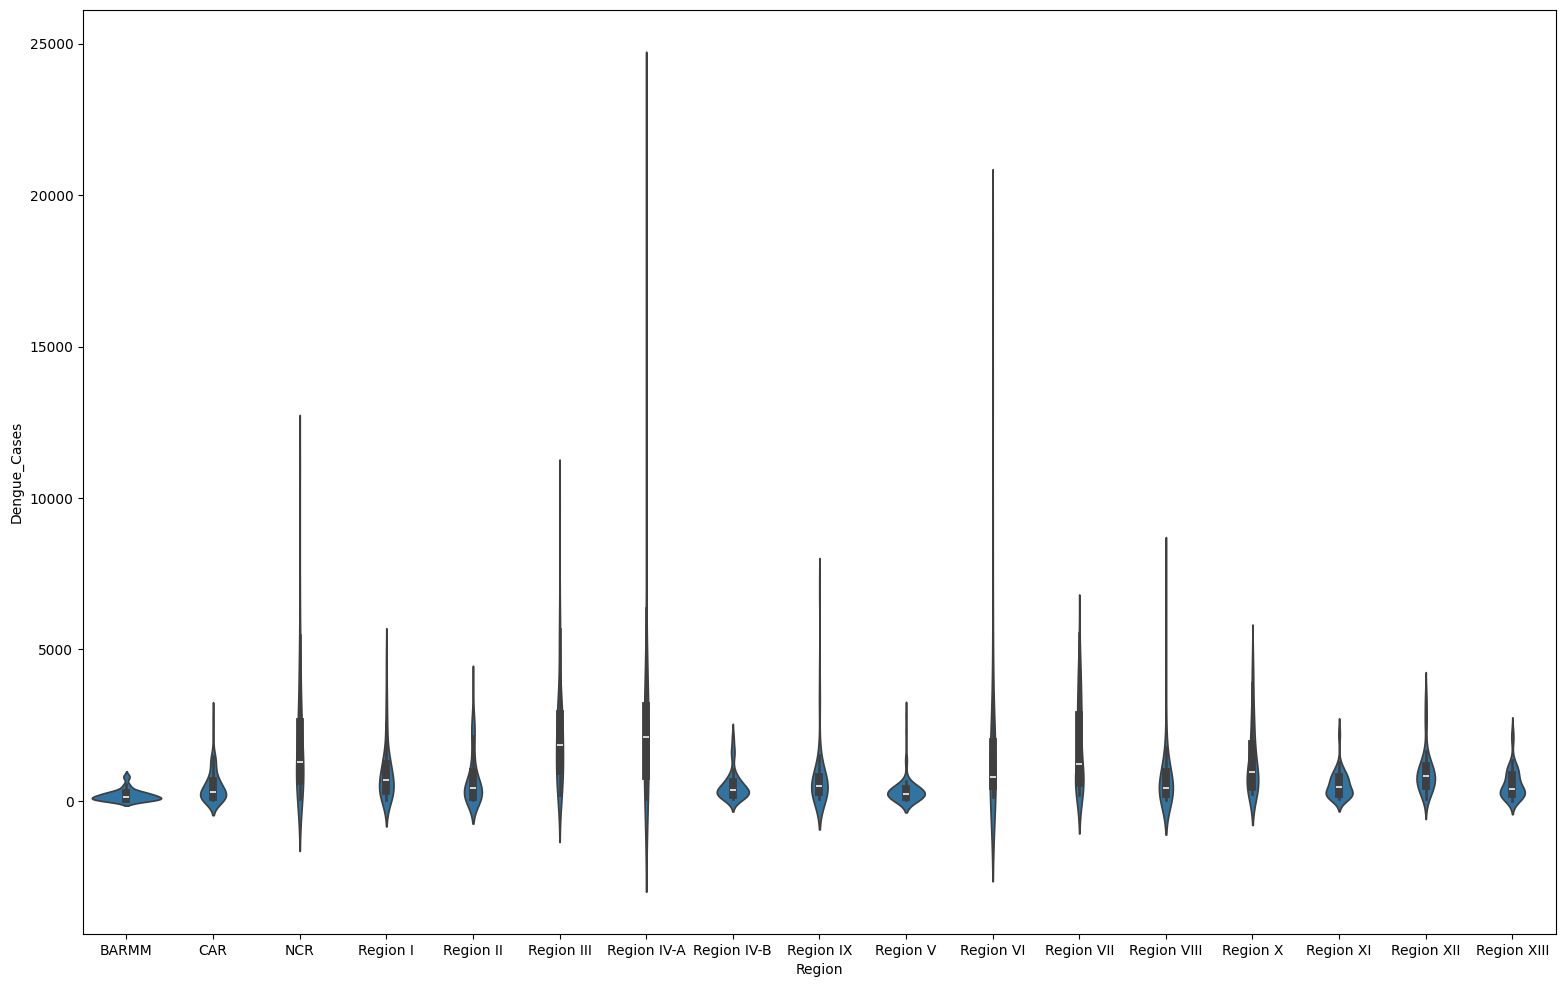

In [13]:
sns.violinplot(data=dengue_V2, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

<h1>Insight 1</h1>
<h2>The number of dengue cases has been fluctuated over the years. In 2016, there were 209,544 cases. This dropped to 154,155 in 2017. The number of cases increased in 2018 to 250,783, and then rose sharply in 2019 to 441,902. However, in 2020, the number of cases dropped significantly to just 91,041.</h2>

In [14]:
yearly = dengue.groupby('Year')['Dengue_Cases'].sum()
yearly

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

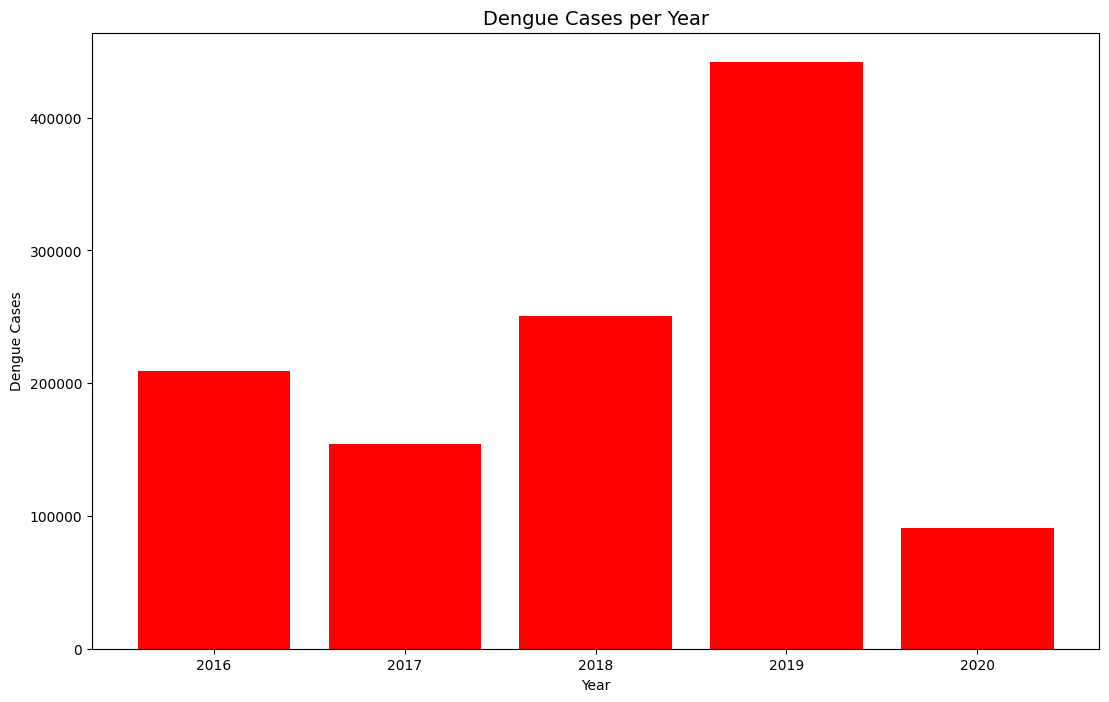

In [15]:
yearly = dengue.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(13,8))
plt.bar(yearly.index, yearly.values, color='red')
plt.title("Dengue Cases per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.show()

<h1>Insight 2</h1>
<h2>Region IV-A has recorded the highest number of dengue cases with 163,029, followed by Region III with 131,064 and Region VI with 117,523 cases. These regions have the most significant share of the total dengue cases, reflecting both higher population.</h2>

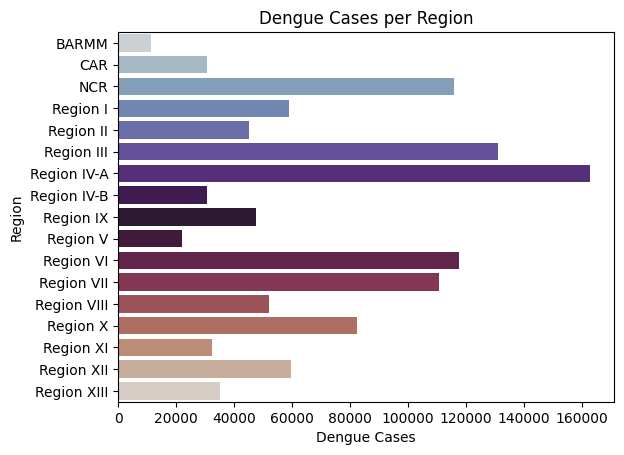

<Figure size 1300x800 with 0 Axes>

In [16]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values()
sns.barplot(x=region_cases.values, y=region_cases.index, palette="twilight")
plt.title("Dengue Cases per Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Region")
plt.figure(figsize=(13, 8))
plt.show()

<h1>Insight 3</h1>
<h2>Dengue cases are highest in August (2,206) and September (2,093), followed by July (1,626) and October (1,384)</h2>

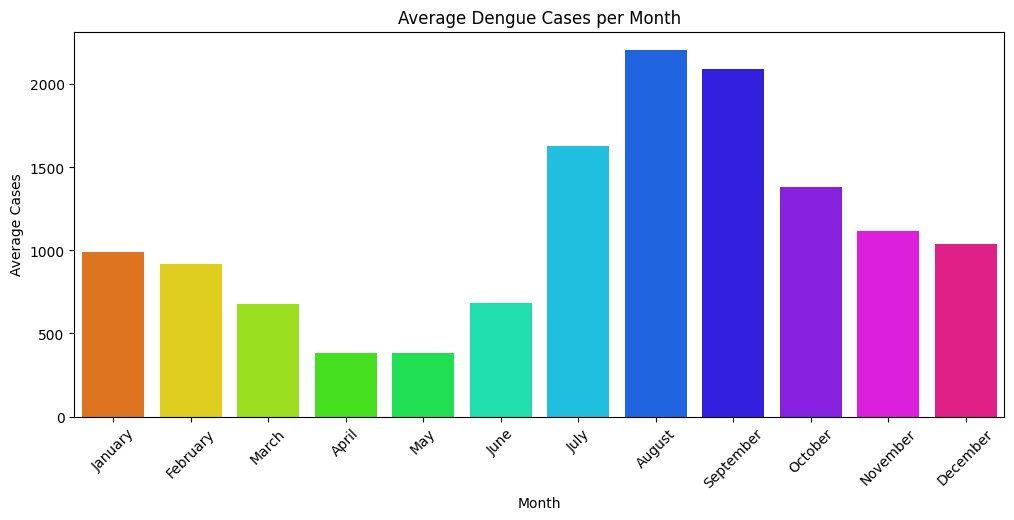

In [17]:
monthly_cases = dengue.groupby("Month")["Dengue_Cases"].mean()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_cases = monthly_cases.reindex(month_order)
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_cases.index, y=monthly_cases.values, palette="hsv")
plt.title("Average Dengue Cases per Month")
plt.ylabel("Average Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 4</h1>
<h2>Some regions experience a steady rise in dengue cases over time, whereas others see fluctuating numbers.</h2>

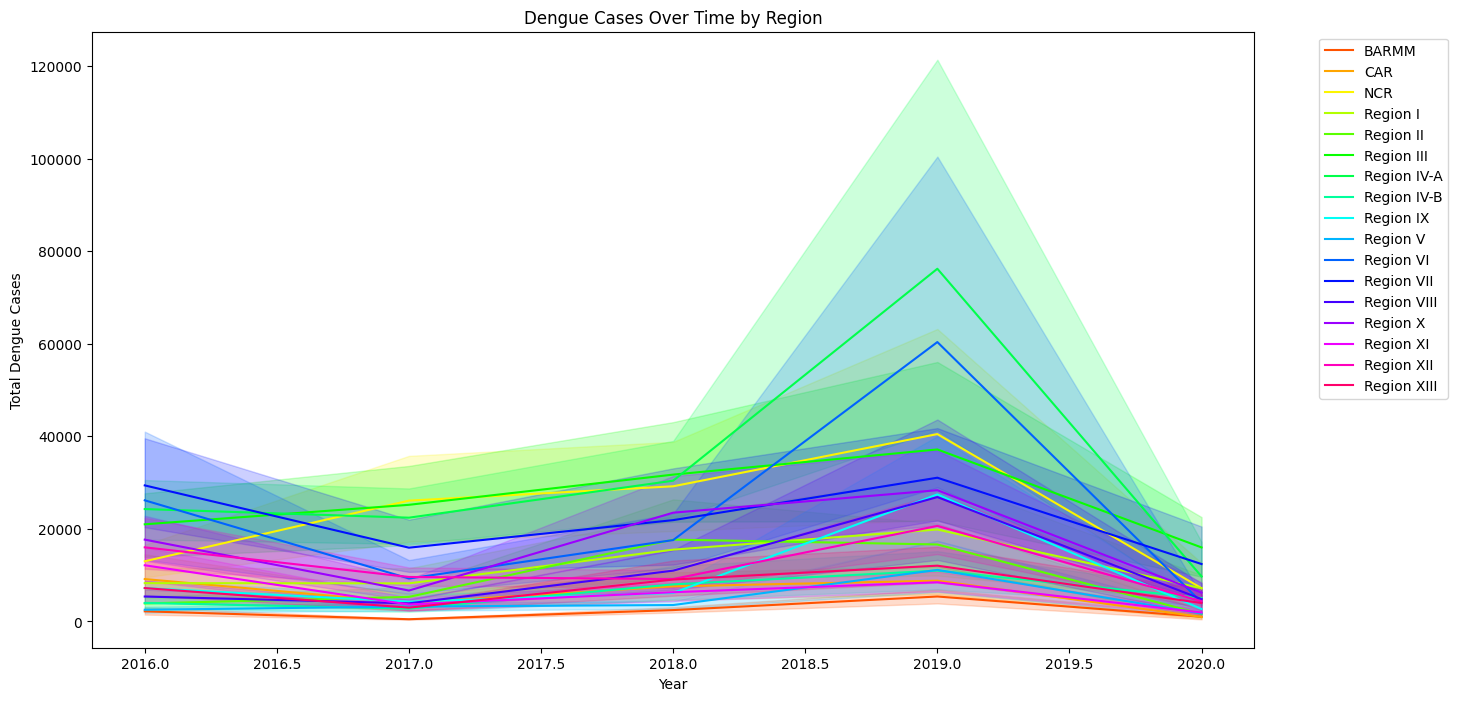

In [18]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=dengue, x = "Year", y = "Dengue_Cases", hue="Region", estimator="sum", markers=True, palette="hsv")
plt.title("Dengue Cases Over Time by Region")
plt.ylabel("Total Dengue Cases")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h1>Insight 5</h1>
<h2>Dengue cases vary a lot each month and from year to year, showing that outbreaks happen unevenly.</h2>

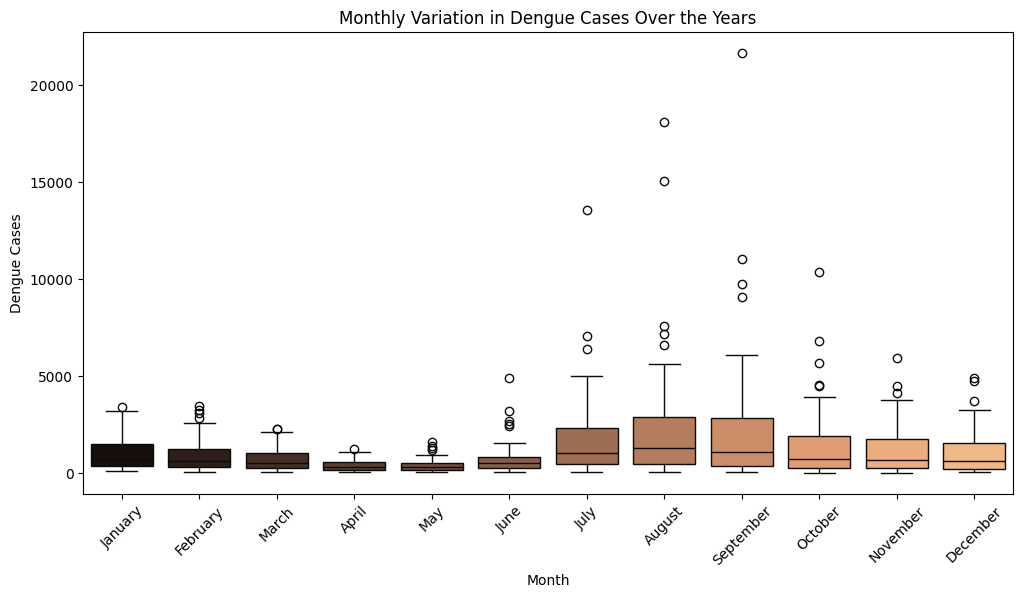

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dengue, x="Month", y="Dengue_Cases", palette="copper", order=month_order)
plt.title("Monthly Variation in Dengue Cases Over the Years")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 6</h1>
<h2>The highest number of dengue deaths occurred in October 2016, with a total of 3,954 deaths.</h2>

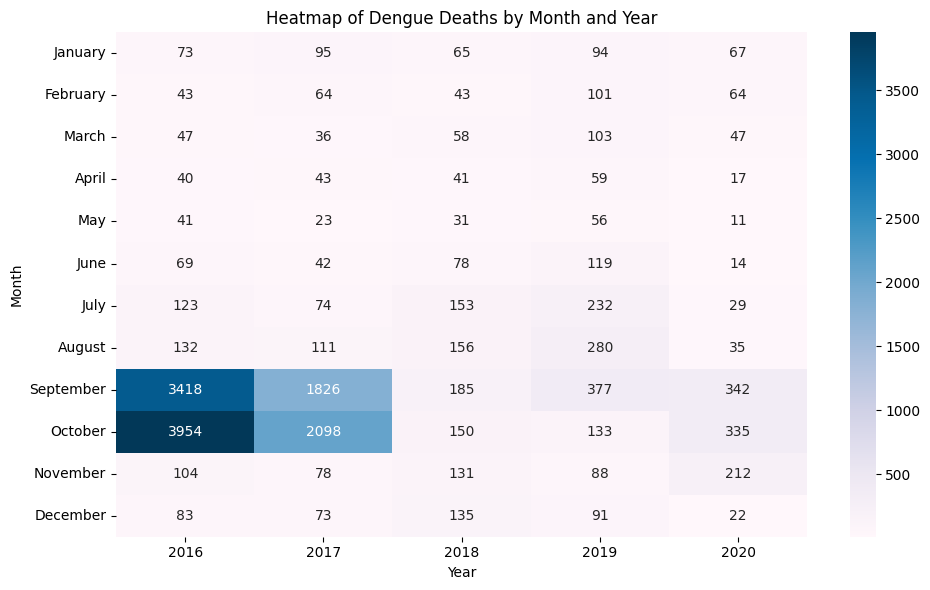

In [20]:
pivot_deaths = dengue.pivot_table(values='Dengue_Deaths', index='Month', columns='Year', aggfunc='sum')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_deaths = pivot_deaths.reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_deaths, annot=True, fmt=".0f", cmap='PuBu')
plt.title('Heatmap of Dengue Deaths by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

<h1>Insight 7</h1>
<h2>Some regions have a higher number of dengue deaths compared to the number of cases. NCR reported 4,008 deaths, despite not having the highest number of cases. Similarly, Region XII recorded 2,796 deaths</h2>

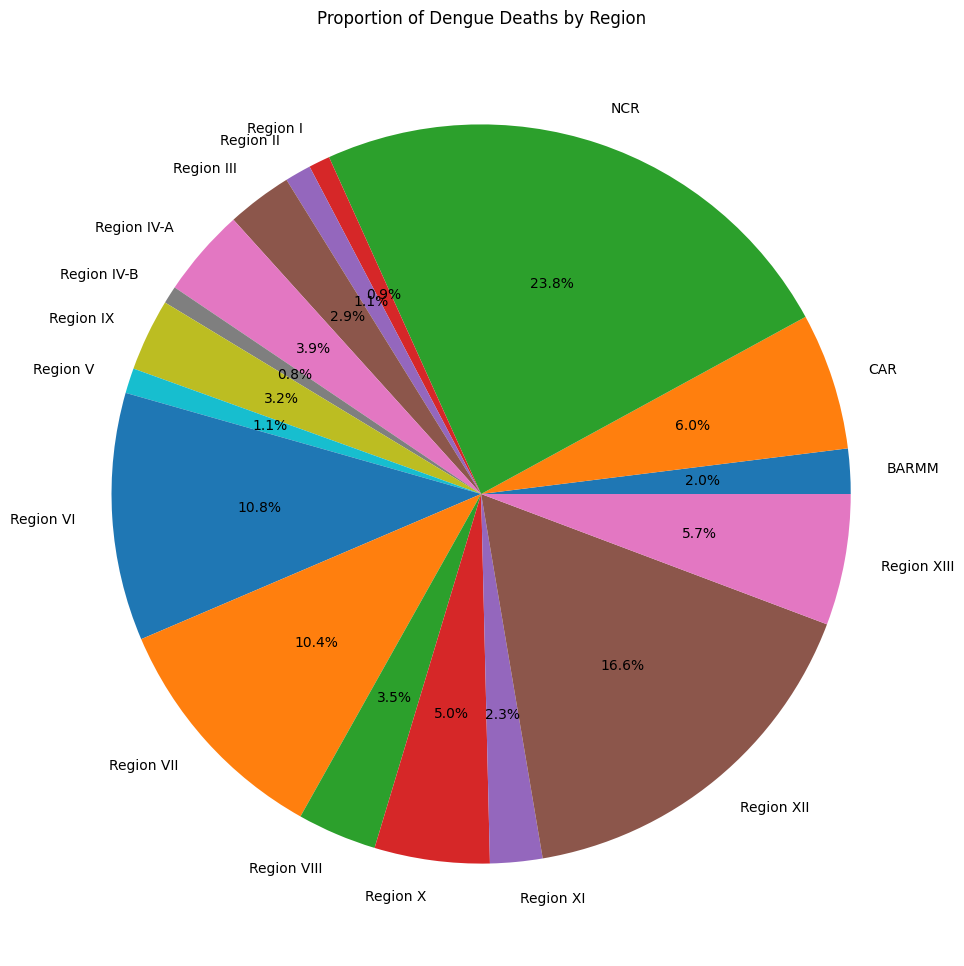

In [47]:
deaths_by_region = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()
deaths_by_region
plt.figure(figsize=(12,12))
plt.pie(deaths_by_region['Dengue_Deaths'], labels=deaths_by_region['Region'], autopct='%1.1f%%')

plt.title("Proportion of Dengue Deaths by Region")
plt.show()

<h1>Insight 8</h1>
<h2>In 2016, dengue deaths were at their highest, even though there were fewer reported cases. Meanwhile, 2019 saw the most dengue cases, but the number of deaths was not as high in comparison.</h2>

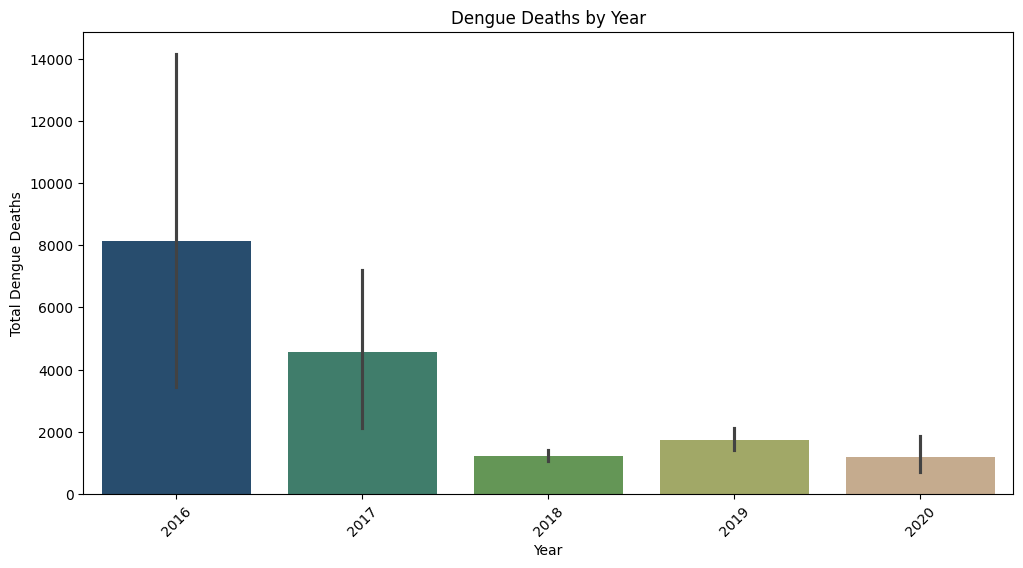

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dengue, x='Year', y='Dengue_Deaths', estimator=np.sum, palette='gist_earth')
plt.title('Dengue Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.xticks(rotation=45)
plt.show()

<h1>Insight 9</h1>
<h2>There is a positive correlation  between the number of dengue cases and deaths, but times with many cases don't always result in more deaths.</h2>

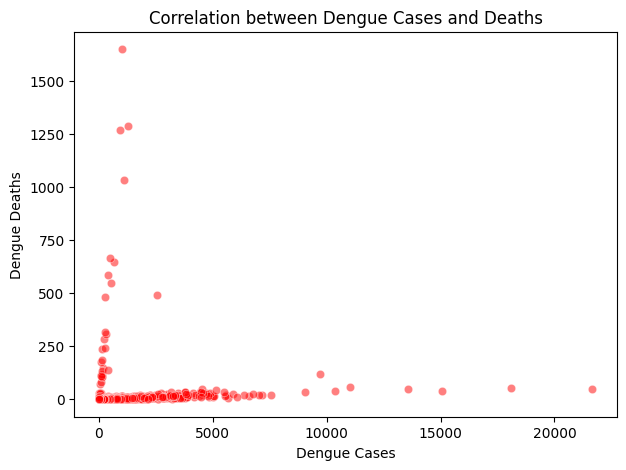

In [22]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5, color = 'red')
plt.title("Correlation between Dengue Cases and Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight 10</h1>
<h2>There is a positive correlation  between the number of dengue cases and deaths, but times with many cases don't always result in more deaths.</h2>

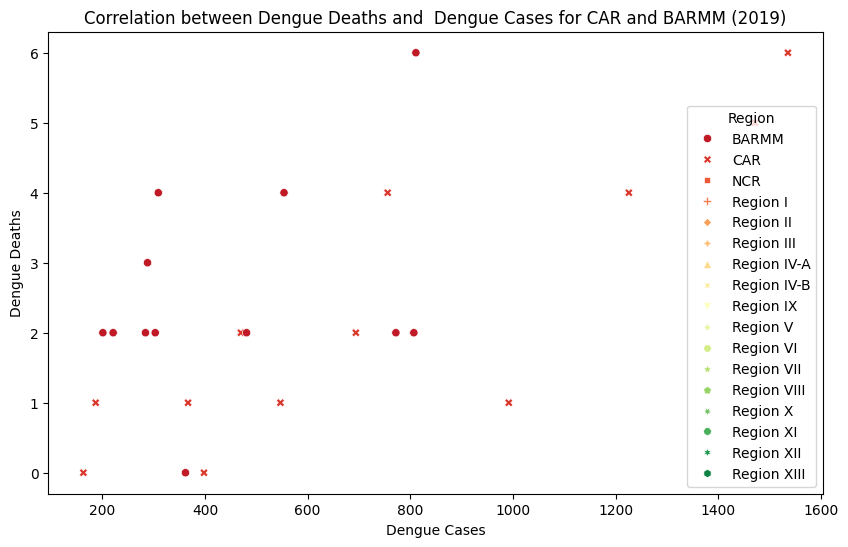

In [23]:
car_barmm_2019 = dengue[(dengue['Year'] == 2019) & dengue['Region'].isin(['CAR', 'BARMM'])]
car_barmm_2019
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_barmm_2019, x='Dengue_Cases', y='Dengue_Deaths', hue='Region', palette='RdYlGn', style='Region')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Correlation between Dengue Deaths and  Dengue Cases for CAR and BARMM (2019)')
plt.show()